# MNIST digit recognition Neural Network
---

# 1. Imports
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense

# 2. Understanding the data
---

## 2.1. Load the dataset and split into train and test set

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 2.2. Data visualization

In [3]:
X_train.shape

(60000, 28, 28)

- 60,000 training images
- Each image is 28 x 28 pixels

In [4]:
y_train.shape

(60000,)

- 60,000 arrays
- Each of size 10 (from 0-9)
- For example, 1 is represented as [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [5]:
X_test.shape

(10000, 28, 28)

- 10,000 test images
- Each image is 28 x 28 pixels

In [6]:
y_test.shape

(10000,)

- 10,000 arrays similar to __y_train__

## 2.3. Images

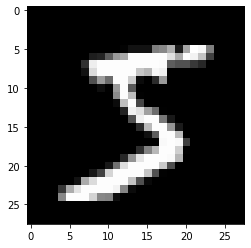

In [7]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

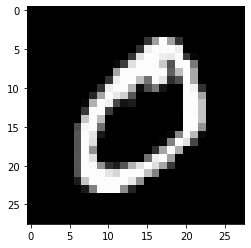

In [8]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

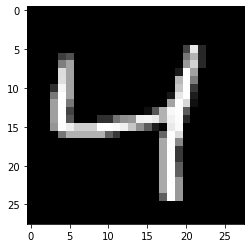

In [9]:
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

# 3. Data manipulation
---

## 3.1. Flatten 28 X 28 images into a 1 X 784 vector for each image

In [10]:
# X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
# X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
X_train = X_train.reshape((60000, 784))
X_train.shape

(60000, 784)

In [11]:
X_test = X_test.reshape((10000, 784))
X_test.shape

(10000, 784)

In [12]:
y_train.shape

(60000,)

In [13]:
y_test.shape

(10000,)

- y_train and y_test are of the required shape and don't need to be changed.

## 3.2. Normalize inputs from 0-255 in images to 0-1

In [14]:
X_train = X_train / 255
X_test = X_test / 255

## 3.3. One hot encode outputs

In [15]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 4. Build the model
---

## 4.1. Define model type (Neural Network)

In [16]:
model = Sequential()

## 4.2. Define architecture

In [17]:
model.add(Dense(784, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

This is a dense nueral network with architecture:

| Layer | Activation function   | Neurons |
| ---   | ---          | ---     |
|  1    | ReLU         | 784     |
|  2    | ReLU         | 10      |
|  3    | Softmax      | 10      |

## 4.3 Compile model

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4.4. Training model

In [19]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

Epoch 1/30
300/300 - 2s - loss: 0.4241 - accuracy: 0.8706 - val_loss: 0.1698 - val_accuracy: 0.9487
Epoch 2/30
300/300 - 2s - loss: 0.1324 - accuracy: 0.9619 - val_loss: 0.1176 - val_accuracy: 0.9662
Epoch 3/30
300/300 - 2s - loss: 0.0876 - accuracy: 0.9752 - val_loss: 0.1005 - val_accuracy: 0.9703
Epoch 4/30
300/300 - 2s - loss: 0.0625 - accuracy: 0.9817 - val_loss: 0.0811 - val_accuracy: 0.9753
Epoch 5/30
300/300 - 2s - loss: 0.0478 - accuracy: 0.9860 - val_loss: 0.0748 - val_accuracy: 0.9784
Epoch 6/30
300/300 - 2s - loss: 0.0360 - accuracy: 0.9898 - val_loss: 0.0737 - val_accuracy: 0.9801
Epoch 7/30
300/300 - 2s - loss: 0.0269 - accuracy: 0.9930 - val_loss: 0.0707 - val_accuracy: 0.9801
Epoch 8/30
300/300 - 2s - loss: 0.0203 - accuracy: 0.9947 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoch 9/30
300/300 - 2s - loss: 0.0157 - accuracy: 0.9958 - val_loss: 0.0760 - val_accuracy: 0.9783
Epoch 10/30
300/300 - 2s - loss: 0.0132 - accuracy: 0.9967 - val_loss: 0.0861 - val_accuracy: 0.9769

## 4.5. Evaluate the model

In [20]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: ", scores[0])
print("Test Accuracy: ", (scores[1]))
print("Baseline Error: ", (100-scores[1]*100))

Test loss:  0.09502233564853668
Test Accuracy:  0.9815000295639038
Baseline Error:  1.8499970436096191


## 4.6. Save the model in a h5 file

In [21]:
model.save("model.h5")

# 5. Convert the model to a web friendly format
---

In [22]:
!tensorflowjs_converter --input_format keras './model.h5' '../UI/model'

2021-03-21 17:58:11.637568: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-03-21 17:58:11.637600: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


- Uses tensorflowjs to convert the model to a format which can run on the browser
- Allows to run the model on a single page web app without a backend